In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data
* MNIST dataset

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.max()

### Preprocessing
* Normalizing the data
* Reshaping the data

In [7]:
# Normalizing the data
x_train = x_train / x_train.max()
X_test = x_test / x_test.max()

In [8]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(-1, 28, 28, 1) # -1: batch_size, 28: width, 28: height, 1: color_channels
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
# One-hot encode the labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Creating and Training the Model

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # Softmax because of output will be the multi class
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [10]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1) # patience: how many epochs to wait before stopping

In [11]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1399 - accuracy: 0.9570 - val_loss: 13.7077 - val_accuracy: 0.9705
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 13.1132 - val_accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 52.6589 - val_accuracy: 0.9336


In [14]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139927,0.956967,13.707724,0.9705
1,0.047512,0.985517,13.113235,0.9762
2,0.029396,0.990683,52.658863,0.9336


In [15]:
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.99999994, 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       980
           1       1.00      0.79      0.88      1135
           2       0.98      0.93      0.96      1032
           3       0.98      0.98      0.98      1010
           4       1.00      0.93      0.96       982
           5       0.99      0.97      0.98       892
           6       0.98      0.96      0.97       958
           7       0.99      0.95      0.97      1028
           8       0.63      1.00      0.77       974
           9       0.99      0.88      0.93      1009

    accuracy                           0.93     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.93      0.94     10000


In [17]:
print(confusion_matrix(y_test, predictions))

[[954   0   0   0   0   1   4   1  20   0]
 [  0 893   5   6   0   0   1   2 228   0]
 [  0   0 963   0   0   0   4   2  63   0]
 [  0   0   1 985   0   2   0   1  21   0]
 [  0   0   2   0 915   0   4   0  52   9]
 [  0   0   0   5   0 862   2   1  22   0]
 [  2   1   0   1   1   2 919   0  32   0]
 [  0   0  10   1   0   0   0 981  32   4]
 [  1   0   0   0   0   0   0   1 972   0]
 [  0   1   0   4   1   6   0   2 103 892]]


<Axes: >

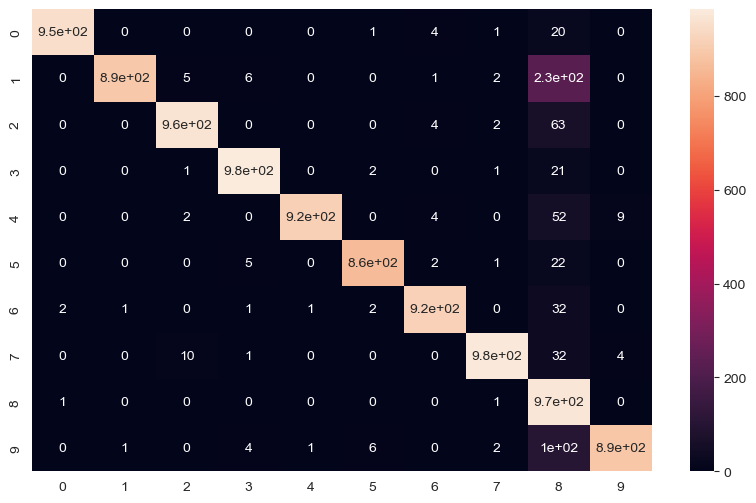

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

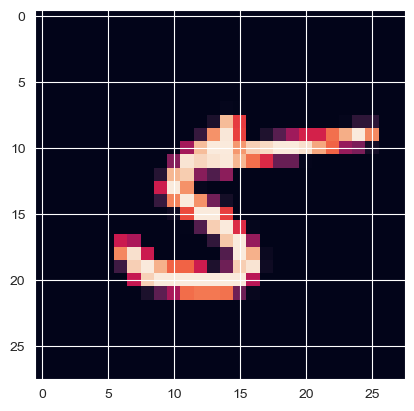

In [19]:
import random

random_index = random.randint(0, len(x_test))
plt.imshow(x_test[random_index].reshape(28, 28))

In [20]:
model.predict(x_test[random_index].reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 20ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [21]:
y_test[random_index]

5